In [1]:
import os
import sys

sys.path.append(os.path.dirname(os.getcwd())) 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from datetime import datetime, timedelta

from src.constants import hustle_stats
from src.steps.model.model import CompositeEffort

pd.set_option('display.max_columns', None)

In [2]:
DATA_DIR = '../data/'
input_path = os.path.join(DATA_DIR, 'transformed_data', 'df_transformed.csv')
df_trans = pd.read_csv(input_path)

In [3]:
# Features
features_to_exclude = ['CONTESTED_SHOTS','BOX_OUTS', 'SCREEN_AST_PTS', 'BOX_OUT_PLAYER_TEAM_REBS', 'LOOSE_BALLS_RECOVERED','BOX_OUT_PLAYER_REBS']
features = list(set(hustle_stats)-set(features_to_exclude))
off_features = ['OFF_BOXOUTS','SCREEN_ASSISTS','OFF_LOOSE_BALLS_RECOVERED']
def_features = [
    'DEFLECTIONS','CONTESTED_SHOTS_3PT', 'CONTESTED_SHOTS_2PT',
    'DEF_LOOSE_BALLS_RECOVERED','CHARGES_DRAWN','DEF_BOXOUTS'
] 

In [4]:
df_trans.head(2)

,SEASON_ID,GAME_ID,GAME_DATE,AWAY_TEAM_ID,HOME_TEAM_ID,AWAY_TEAM_ABBREVIATION,HOME_TEAM_ABBREVIATION,AWAY_TEAM_NAME,HOME_TEAM_NAME,AWAY_FGM,HOME_FGM,AWAY_FGA,HOME_FGA,AWAY_FG3M,HOME_FG3M,AWAY_FG3A,HOME_FG3A,AWAY_FTM,HOME_FTM,AWAY_FTA,HOME_FTA,AWAY_OREB,HOME_OREB,AWAY_DREB,HOME_DREB,AWAY_AST,HOME_AST,AWAY_STL,HOME_STL,AWAY_BLK,HOME_BLK,AWAY_TOV,HOME_TOV,AWAY_PF,HOME_PF,AWAY_PTS,HOME_PTS,NEUTRAL_IND,AWAY_CHARGES_DRAWN,HOME_CHARGES_DRAWN,AWAY_CONTESTED_SHOTS,HOME_CONTESTED_SHOTS,AWAY_DEF_LOOSE_BALLS_RECOVERED,HOME_DEF_LOOSE_BALLS_RECOVERED,AWAY_SCREEN_AST_PTS,HOME_SCREEN_AST_PTS,AWAY_DEF_BOXOUTS,HOME_DEF_BOXOUTS,AWAY_SCREEN_ASSISTS,HOME_SCREEN_ASSISTS,AWAY_OFF_LOOSE_BALLS_RECOVERED,HOME_OFF_LOOSE_BALLS_RECOVERED,AWAY_OFF_BOXOUTS,HOME_OFF_BOXOUTS,AWAY_CONTESTED_SHOTS_3PT,HOME_CONTESTED_SHOTS_3PT,AWAY_BOX_OUT_PLAYER_REBS,HOME_BOX_OUT_PLAYER_REBS,AWAY_DEFLECTIONS,HOME_DEFLECTIONS,AWAY_BOX_OUTS,HOME_BOX_OUTS,AWAY_LOOSE_BALLS_RECOVERED,HOME_LOOSE_BALLS_RECOVERED,AWAY_BOX_OUT_PLAYER_TEAM_REBS,HOME_BOX_OUT_PLAYER_TEAM_REBS,AWAY_CONTESTED_SHOTS_2PT,HOME_CONTESTED_SHOTS_2PT,HOME_POSS,AWAY_POSS,HOME_ORtg,AWAY_ORtg,HOME_NRtg,AWAY_NRtg,SCREEN_AST_PTS_DIFF,DEFLECTIONS_DIFF,CONTESTED_SHOTS_DIFF,DEF_BOXOUTS_DIFF,CONTESTED_SHOTS_2PT_DIFF,BOX_OUT_PLAYER_TEAM_REBS_DIFF,CHARGES_DRAWN_DIFF,LOOSE_BALLS_RECOVERED_DIFF,OFF_BOXOUTS_DIFF,BOX_OUTS_DIFF,DEF_LOOSE_BALLS_RECOVERED_DIFF,SCREEN_ASSISTS_DIFF,BOX_OUT_PLAYER_REBS_DIFF,OFF_LOOSE_BALLS_RECOVERED_DIFF,CONTESTED_SHOTS_3PT_DIFF
0,22022,22200001,2022-10-18,1610612755,1610612738,PHI,BOS,Philadelphia 76ers,Boston Celtics,40,46,80,82,13,12,34,35,24,22,28,28,4,6,27,30,16,24,8,8,3,3,14,11,25,24,117,126,0,0,2,27,34,1,2,19,22,6,2,9,10,0,2,0,0,12,15,4,0,16,16,6,2,1,4,6,2,15,19,99.32,102.32,126.862666,114.347146,12.515520,-12.515520,3,0,7,-4,4,-4,2,3,0,-4,1,1,-4,2,3
1,22022,22200002,2022-10-18,1610612747,1610612744,LAL,GSW,Los Angeles Lakers,Golden State Warriors,40,45,94,99,10,16,40,45,19,17,25,23,9,11,39,37,23,31,12,11,4,4,22,18,18,23,109,123,0,1,1,71,63,2,2,8,43,11,11,3,18,5,1,2,3,36,33,7,6,18,22,13,14,7,3,13,12,35,30,116.12,118.00,105.924905,92.372881,13.552024,-13.552024,35,4,-8,0,-5,-1,0,-4,1,1,0,15,-1,-4,-3


In [5]:
# Model 1 - Offensive Rating
off_home_features = [f"HOME_{stat}" for stat in off_features]
off_away_features = [f"AWAY_{stat}" for stat in off_features]
X_off_home = df_trans[off_home_features]
X_off_away = df_trans[off_away_features]

# Rename columns
X_off_home.columns = X_off_home.columns.str.replace('HOME_','')
X_off_away.columns = X_off_away.columns.str.replace('AWAY_','')

y_off_home = df_trans['HOME_ORtg'] 
y_off_away = df_trans['AWAY_ORtg'] 

X_off = pd.concat([X_off_home, X_off_away], ignore_index=True)
y_off = pd.concat([y_off_home, y_off_away], ignore_index=True)

In [6]:
X_off.head()

,OFF_BOXOUTS,SCREEN_ASSISTS,OFF_LOOSE_BALLS_RECOVERED
0,0,10,2
1,3,18,1
2,1,8,4
3,3,8,3
4,1,13,1


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     94.02
Date:                Thu, 04 Sep 2025   Prob (F-statistic):           1.04e-59
Time:                        21:16:55   Log-Likelihood:                -28396.
No. Observations:                7380   AIC:                         5.680e+04
Df Residuals:                    7376   BIC:                         5.683e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

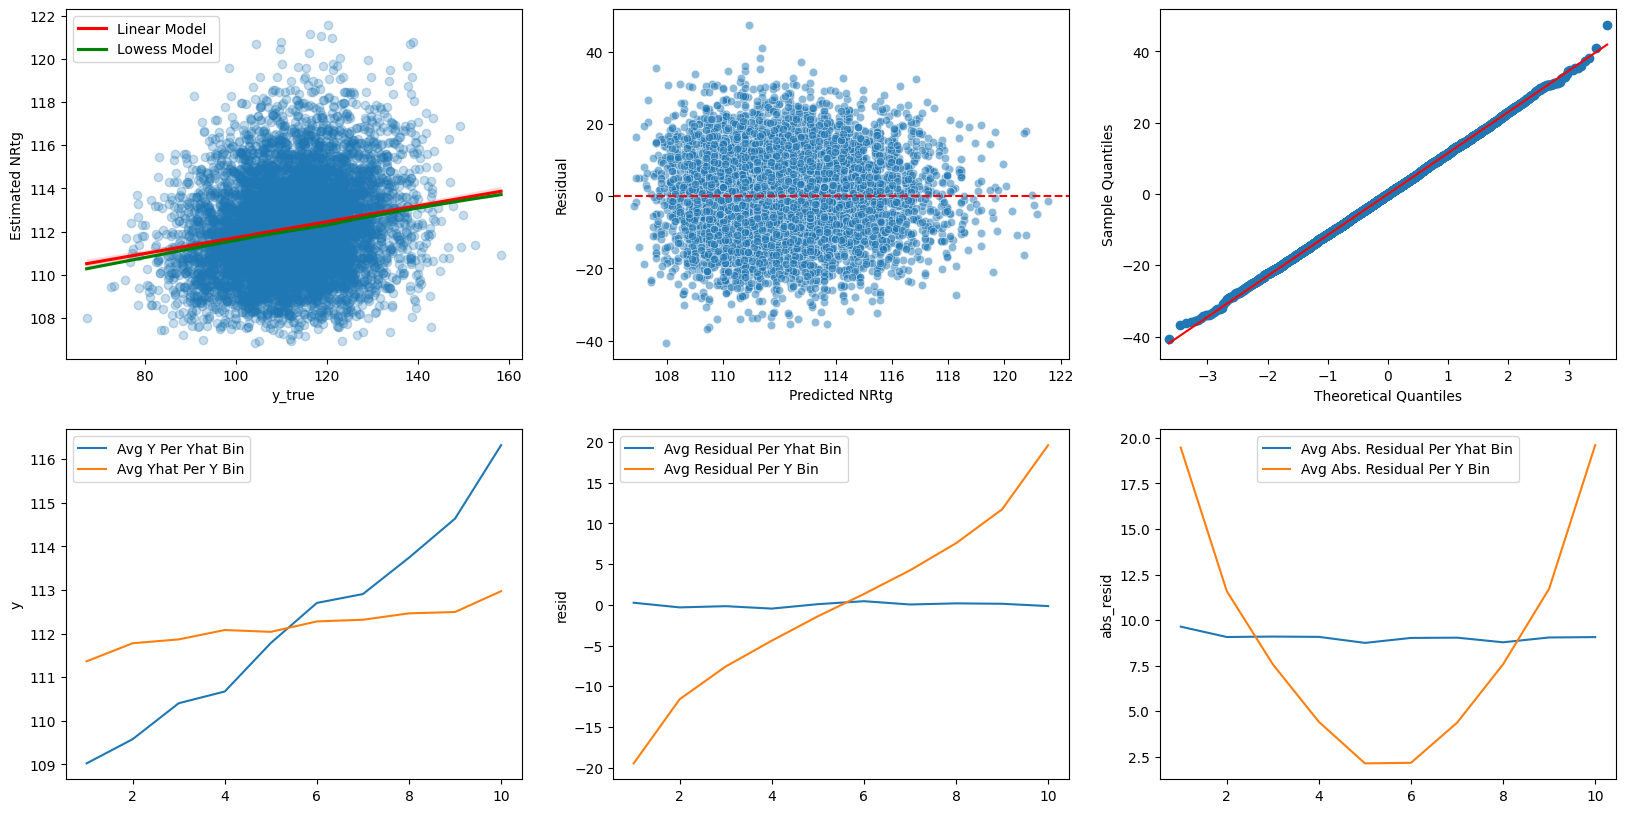

In [7]:
comp_eff_off = CompositeEffort(X=X_off, y=y_off)
off_stage1 = comp_eff_off.estimate_stage1_model()

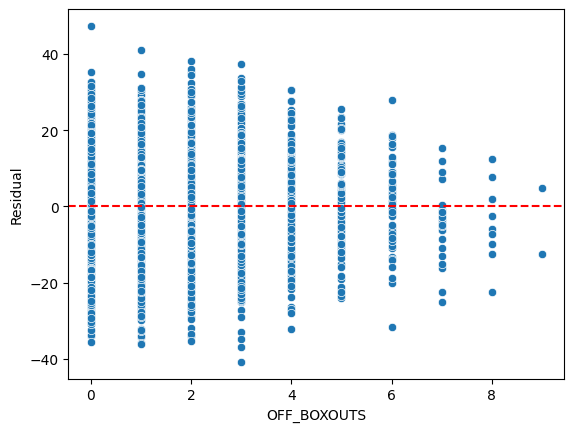

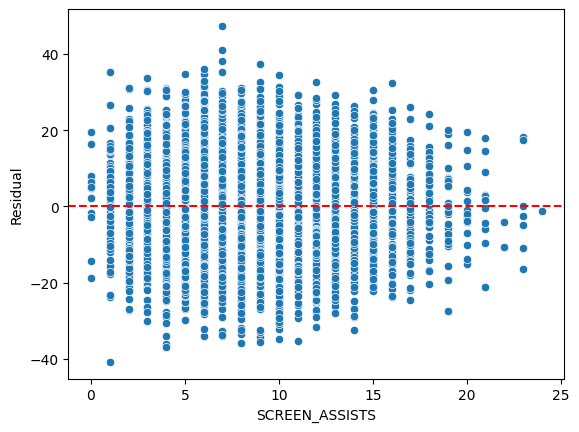

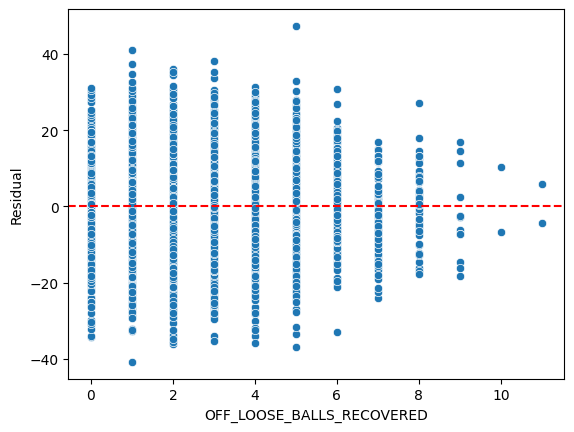

In [8]:
sns.scatterplot(x=X_off['OFF_BOXOUTS'], y=off_stage1.resid)
plt.axhline(y=0, color='red',linestyle='dashed')
plt.ylabel('Residual')
plt.show()

sns.scatterplot(x=X_off['SCREEN_ASSISTS'], y=off_stage1.resid)
plt.axhline(y=0, color='red',linestyle='dashed')
plt.ylabel('Residual')
plt.show()

sns.scatterplot(x=X_off['OFF_LOOSE_BALLS_RECOVERED'], y=off_stage1.resid)
plt.axhline(y=0, color='red',linestyle='dashed')
plt.ylabel('Residual')
plt.show()


In [9]:
# Model 2 - Defensive Rating
def_home_features = [f"HOME_{stat}" for stat in def_features]
def_away_features = [f"AWAY_{stat}" for stat in def_features]
X_def_home = df_trans[def_home_features]
X_def_away = df_trans[def_away_features]

# Rename columns
X_def_home.columns = X_def_home.columns.str.replace('HOME_','')
X_def_away.columns = X_def_away.columns.str.replace('AWAY_','')

y_def_home = df_trans['AWAY_ORtg'] # HOME_DRtg = AWAY_ORtg
y_def_away = df_trans['HOME_ORtg'] # AWAY_DRtg = HOME_ORtg

X_def = pd.concat([X_def_home, X_def_away], ignore_index=True)
y_def = pd.concat([y_def_home, y_def_away], ignore_index=True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     106.3
Date:                Thu, 04 Sep 2025   Prob (F-statistic):          5.67e-129
Time:                        21:16:57   Log-Likelihood:                -28228.
No. Observations:                7380   AIC:                         5.647e+04
Df Residuals:                    7373   BIC:                         5.652e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

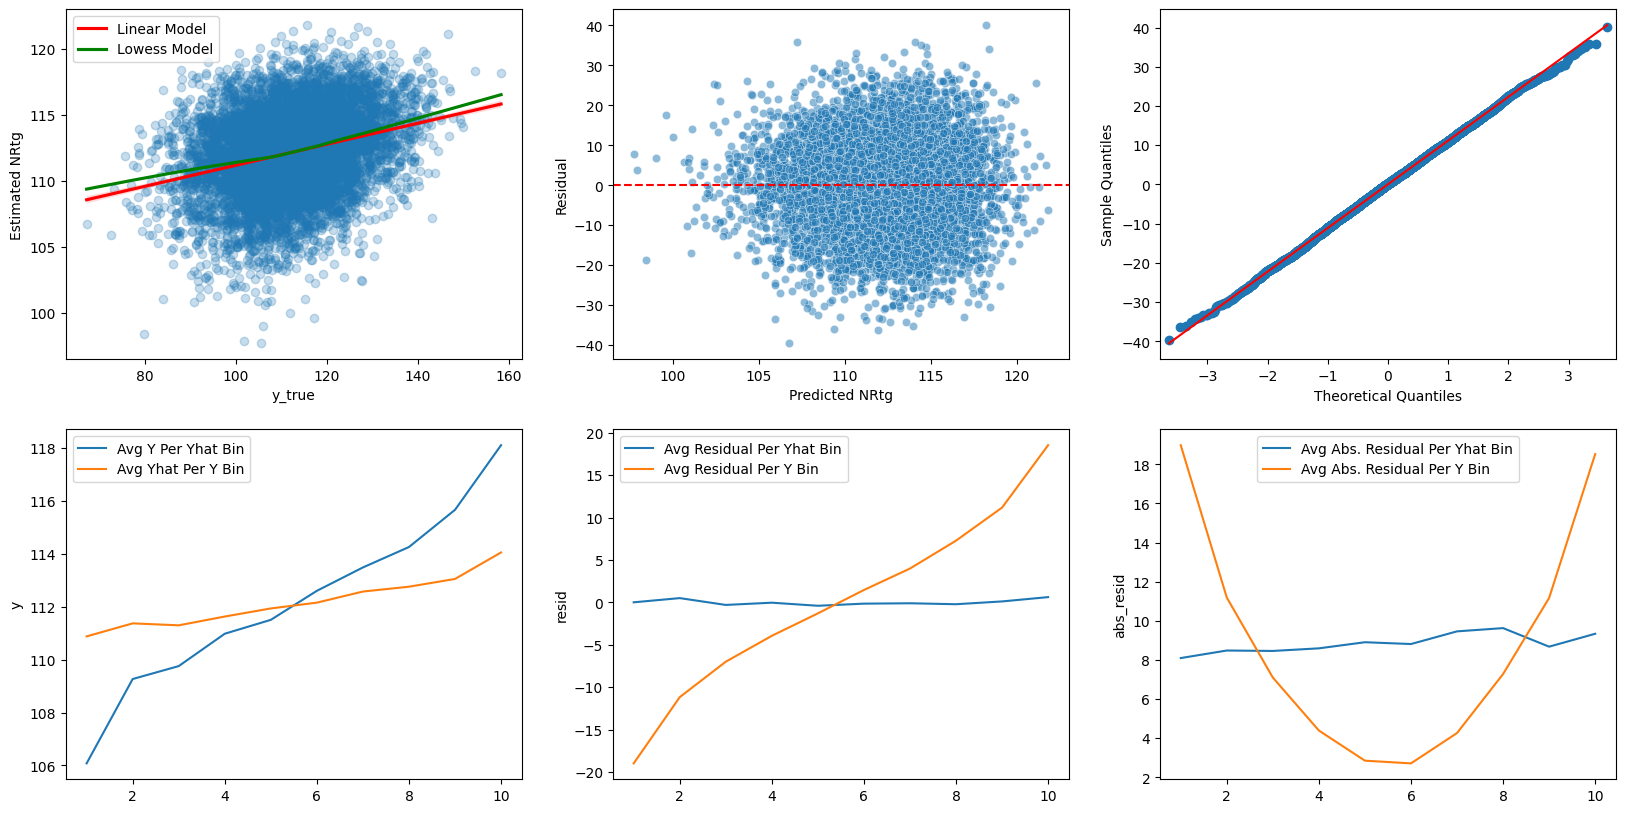

In [10]:
comp_eff_def = CompositeEffort(X=X_def, y=y_def)
def_stage1 = comp_eff_def.estimate_stage1_model()

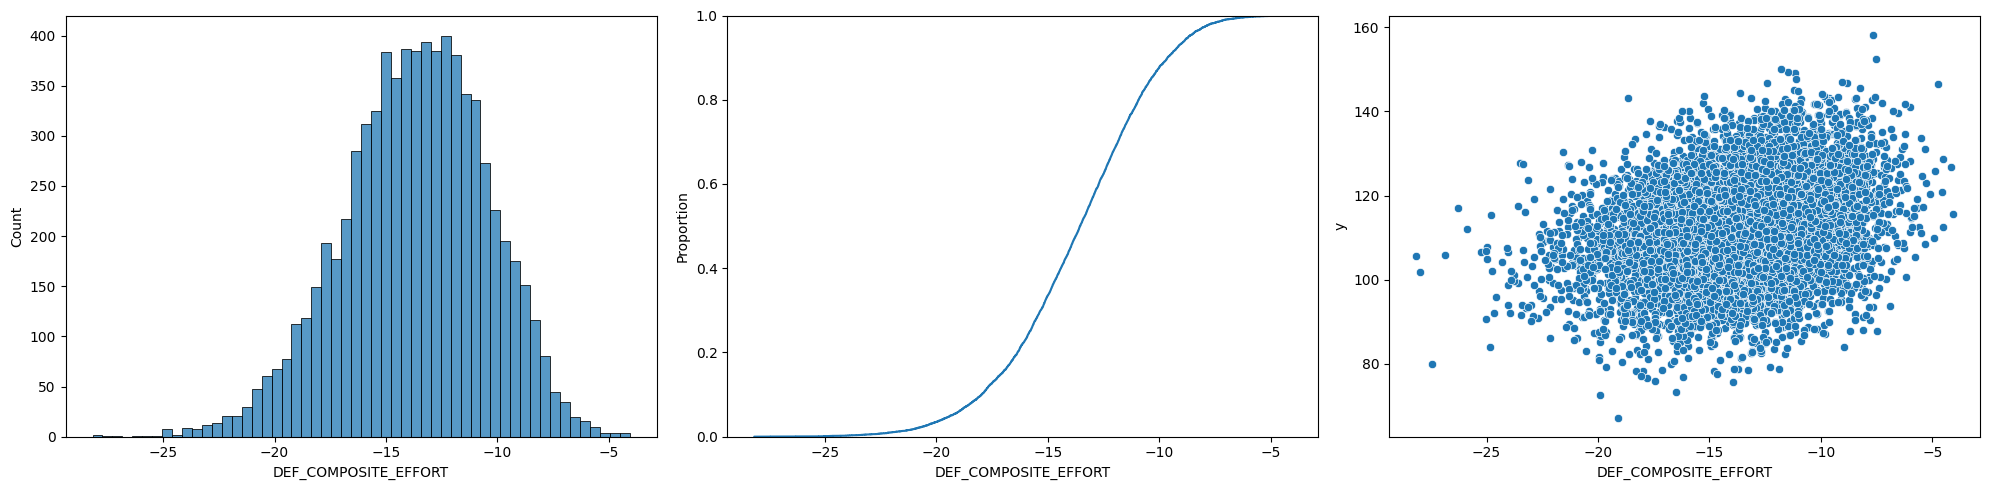

count    7380.000000
mean      -13.709964
std         3.262648
min       -28.168999
0.1%      -25.039960
1%        -22.050683
5%        -19.367599
10%       -17.970215
20%       -16.357240
25%       -15.802763
30%       -15.319126
40%       -14.408720
50%       -13.548692
60%       -12.708226
70%       -11.851716
75%       -11.416670
80%       -10.920913
90%        -9.626155
95%        -8.676421
99%        -7.033984
99.9%      -4.985656
max        -4.064383
Name: DEF_COMPOSITE_EFFORT, dtype: float64


Pearson Correlation:  0.282, P-value:  0.00000
Spearman Correlation:  0.270, P-value:  0.00000
Kendall's Tau Correlation:  0.182, P-value:  0.00000


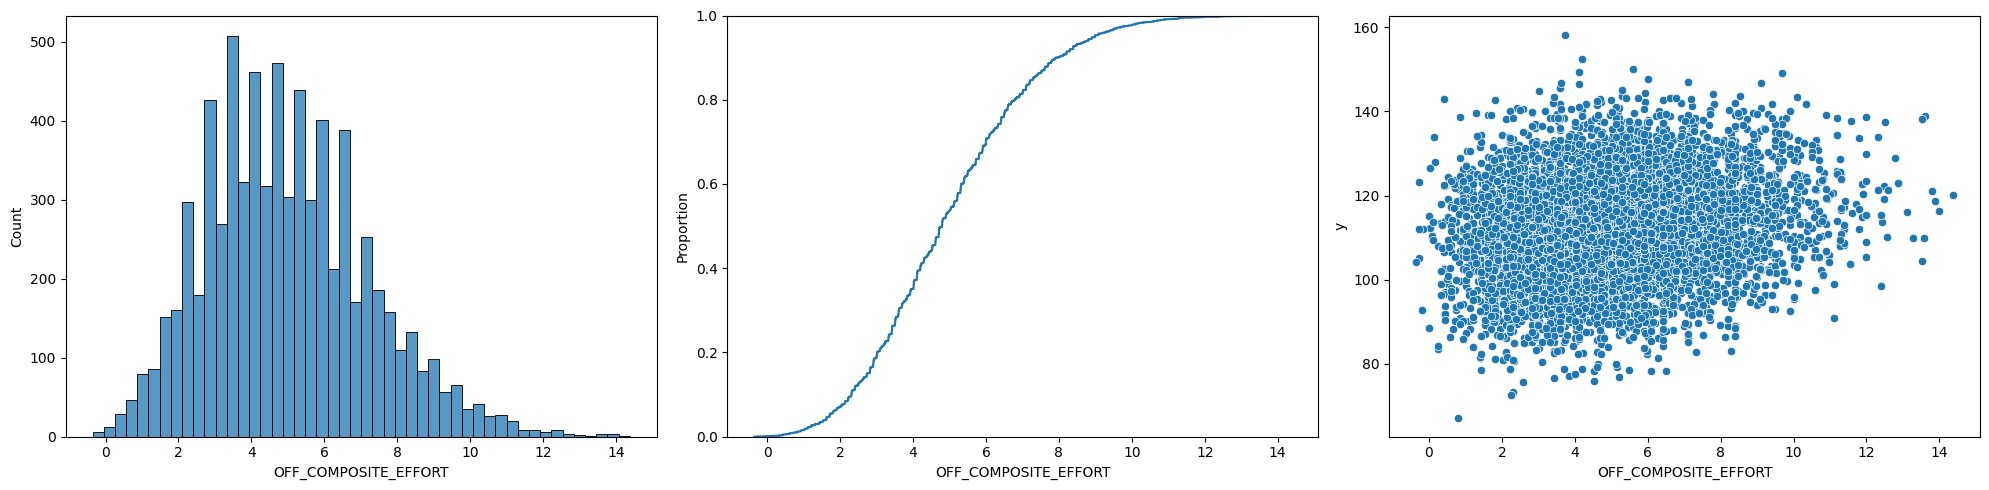

count    7380.000000
mean        4.987913
std         2.218661
min        -0.357880
0.1%        0.012542
1%          0.750007
5%          1.706564
10%         2.305242
20%         3.020676
25%         3.413128
30%         3.610259
40%         4.199841
50%         4.789424
60%         5.320461
70%         5.995876
75%         6.415614
80%         6.784408
90%         7.935052
95%         8.989266
99%        10.883865
99.9%      13.428113
max        14.377368
Name: OFF_COMPOSITE_EFFORT, dtype: float64


Pearson Correlation:  0.192, P-value:  0.00000
Spearman Correlation:  0.185, P-value:  0.00000
Kendall's Tau Correlation:  0.124, P-value:  0.00000


In [11]:
output_dir = os.path.join(DATA_DIR, 'stage1_effort')
def_stage1_effort = comp_eff_def.estimate_composite_effort(off_def='def', output_dir=output_dir)
off_stage1_effort = comp_eff_off.estimate_composite_effort(off_def='off', output_dir=output_dir)

In [12]:
def_stage1_effort.head(2)

,DEFLECTIONS,CONTESTED_SHOTS_3PT,CONTESTED_SHOTS_2PT,DEF_LOOSE_BALLS_RECOVERED,CHARGES_DRAWN,DEF_BOXOUTS,DEF_COMPOSITE_EFFORT
0,16,15,19,2,2,2,-12.413830
1,22,33,30,2,1,11,-18.503964


In [13]:
off_stage1_effort.head(2)

,OFF_BOXOUTS,SCREEN_ASSISTS,OFF_LOOSE_BALLS_RECOVERED,OFF_COMPOSITE_EFFORT
0,0,10,2,5.807841
1,3,18,1,10.982430


In [14]:
# Stage 2 Model: Net Rating = b0 + b1 x OFF_EFFORT + b2 x DEF_EFFORT
def_stage1_effort.shape, off_stage1_effort.shape

((7380, 7), (7380, 4))

In [15]:
df_trans.shape

(3690, 89)

In [17]:
X_def.shape, X_def_home.shape

((7380, 7), (3690, 6))

In [18]:
y_net_home = y_off_home - y_def_home
y_net_away = y_off_away - y_def_away
y_net = pd.concat([y_net_home, y_net_away], ignore_index=True)

In [19]:
y_net.shape

(7380,)

In [22]:
X_net = pd.concat([off_stage1_effort['OFF_COMPOSITE_EFFORT'], def_stage1_effort['DEF_COMPOSITE_EFFORT']], axis=1)

In [23]:
X_net.shape

(7380, 2)

In [24]:
X_net.head(2)

,OFF_COMPOSITE_EFFORT,DEF_COMPOSITE_EFFORT
0,5.807841,-12.413830
1,10.982430,-18.503964


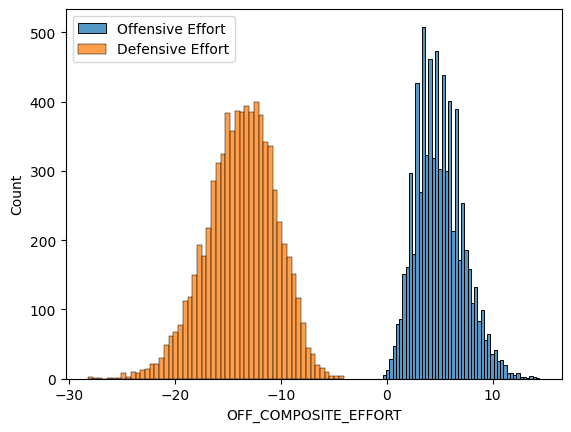

In [32]:
sns.histplot(x='OFF_COMPOSITE_EFFORT',data=X_net, label='Offensive Effort')
sns.histplot(x='DEF_COMPOSITE_EFFORT', data=X_net, label='Defensive Effort')
plt.legend(loc='best')

In [25]:
X1_net = sm.add_constant(X_net)
stage2_model = sm.OLS(endog=y_net, exog=X1_net).fit()
print(stage2_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     200.3
Date:                Thu, 04 Sep 2025   Prob (F-statistic):           1.88e-85
Time:                        21:35:48   Log-Likelihood:                -30512.
No. Observations:                7380   AIC:                         6.103e+04
Df Residuals:                    7377   BIC:                         6.105e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -16.4837 